# Обучение без учителя


## Подготовка датасета

In [1]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [80]:
dataset = pd.read_csv('/content/drive/MyDrive/Data_Analysis/banana_quality_dataset.csv')
dataset.head()

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7


In [82]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

enc_ = OrdinalEncoder()

dataset[['region', 'quality_category', 'ripeness_category']] = enc_.fit_transform(dataset[['region', 'quality_category', 'ripeness_category']])
dataset = dataset.drop('sample_id', axis=1)
dataset = dataset.drop('harvest_date', axis=1)
dataset.head()

,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,Manzano,1.0,1.88,2.0,2.11,3.0,16.83,3.53,21.44,146.92,13.7,58.2,2440.5,183.6
1,Plantain,4.0,2.42,2.0,4.25,2.0,16.73,4.09,26.11,160.48,5.1,280.2,2374.6,109.8
2,Burro,3.0,3.57,1.0,6.24,1.0,21.34,1.63,25.20,225.27,17.7,1246.9,1191.5,147.7
3,Manzano,3.0,2.21,2.0,5.39,2.0,16.75,3.31,13.08,137.80,13.0,1150.2,2845.1,92.8
4,Red Dacca,3.0,2.35,2.0,5.84,2.0,16.90,3.07,12.98,227.84,4.8,526.0,2136.9,129.7


In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
vals = dataset['variety'].unique()
vals

array(['Manzano', 'Plantain', 'Burro', 'Red Dacca', 'Fehi', 'Lady Finger',
       'Blue Java', 'Cavendish'], dtype=object)

In [84]:
# сохраняем только числовые столбцы. Категориальные кодируем в числовые. Целевую переменную (если она есть) - убираем
cols_for_clusters = [
    'region',
    'quality_score',
    'quality_category',
    'ripeness_index',
    'ripeness_category',
    'sugar_content_brix',
    'firmness_kgf',
    'length_cm',
    'weight_g',
    'tree_age_years',
    'altitude_m',
    'rainfall_mm',
    'soil_nitrogen_ppm'
    ]

cols = [
    'region',
    'quality_score',
    'quality_category',
    'ripeness_index',
    'ripeness_category',
    'sugar_content_brix',
    'firmness_kgf',
    'length_cm',
    'weight_g',
    'tree_age_years',
    'altitude_m',
    'rainfall_mm',
    'soil_nitrogen_ppm'
    ]

df= dataset[cols_for_clusters].copy() # делаем копию, чтобы не было сюрпризов с исходным набором данных

In [85]:
X = df
y = dataset["variety"].replace(vals, [0, 1, 2, 3, 4, 5, 6, 7])
yvals = dataset["variety"]

<ipython-input-85-fbb95430811f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = dataset["variety"].replace(vals, [0, 1, 2, 3, 4, 5, 6, 7])


In [86]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

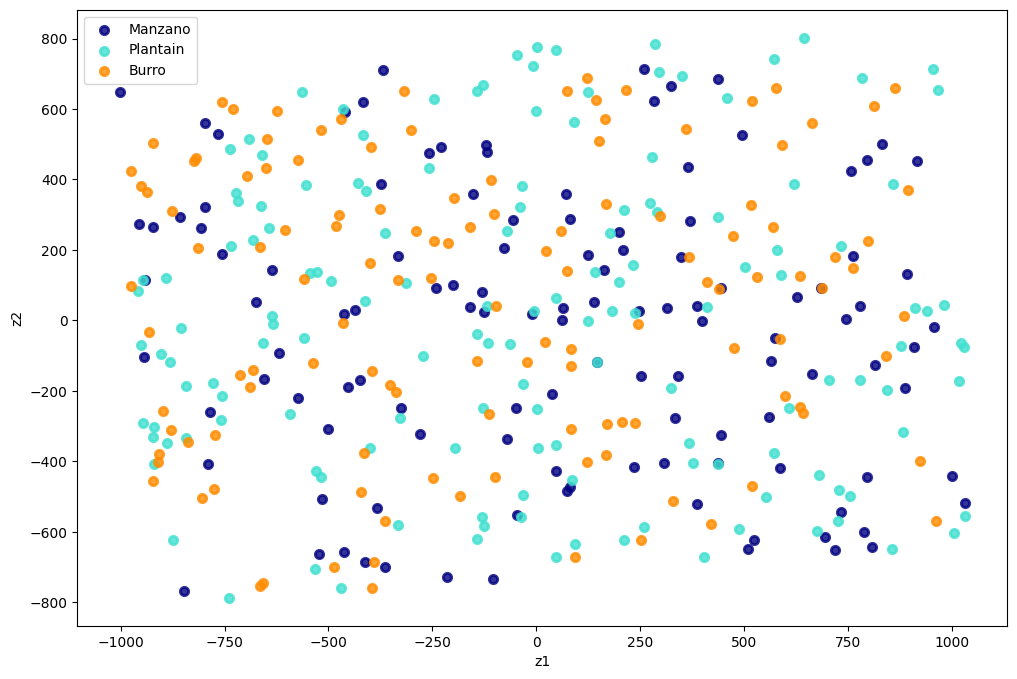

In [87]:
pca = PCA(n_components=2)
X_new = pca.fit(X).transform(X)


plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [88]:
pca.explained_variance_ratio_

array([0.63094294, 0.35847071])

In [89]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

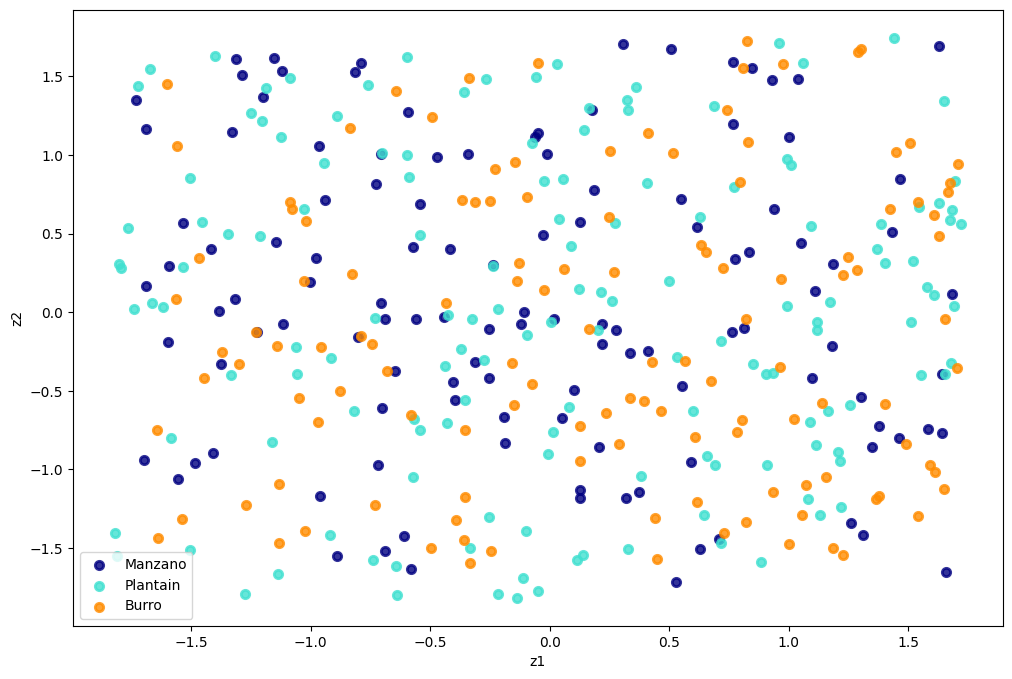

In [90]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [91]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

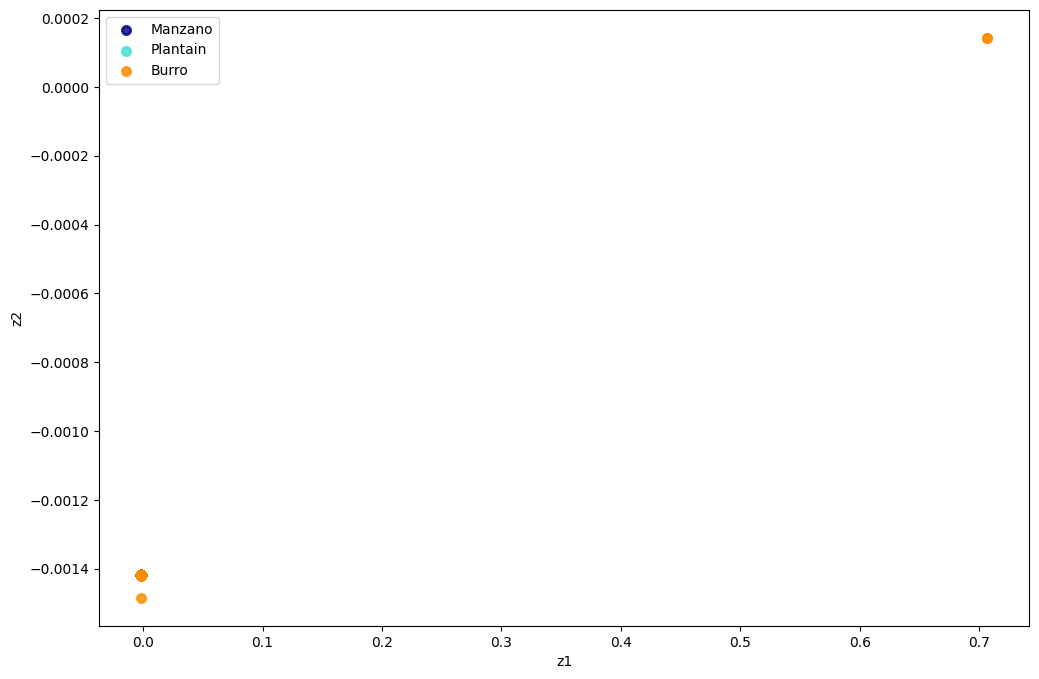

In [92]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

#### Использование в Python

In [93]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

In [94]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (1000, 13)
New Shape of X:  (1000, 2)
Kullback-Leibler divergence after optimization:  0.5236003398895264
No. of iterations:  999


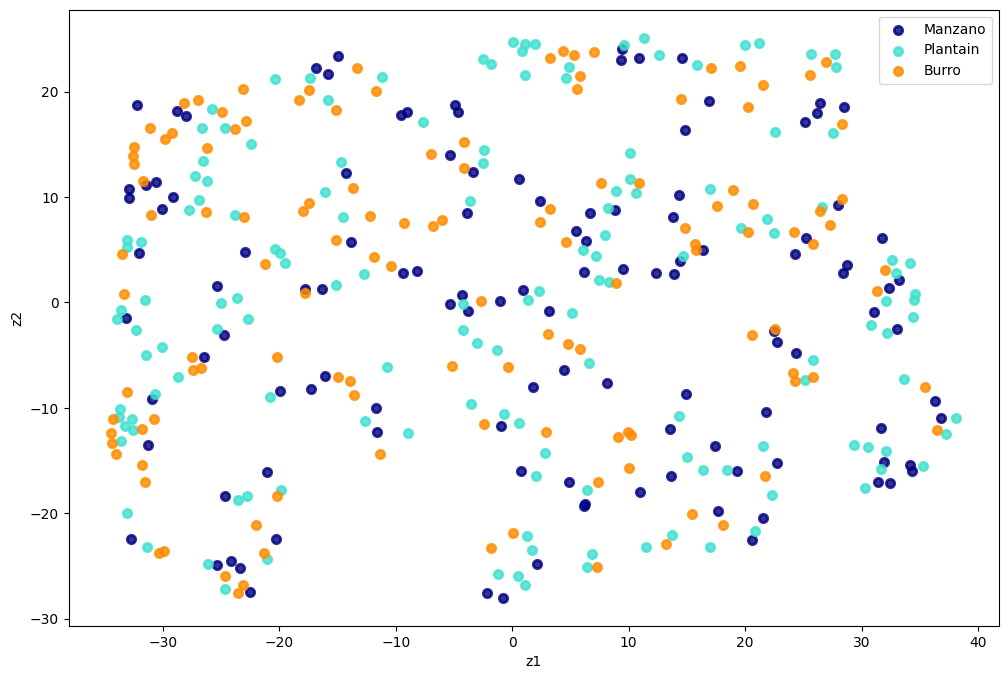

In [95]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

## DBSCAN для кластеризации

In [96]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [181]:
dbscan_cluster1 = DBSCAN(eps = 0.08, min_samples = 1)
X_new = dbscan_cluster1.fit(X)

In [183]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 1000
Estimated no. of noise points: 0
v_measure = 0.4620995419421128


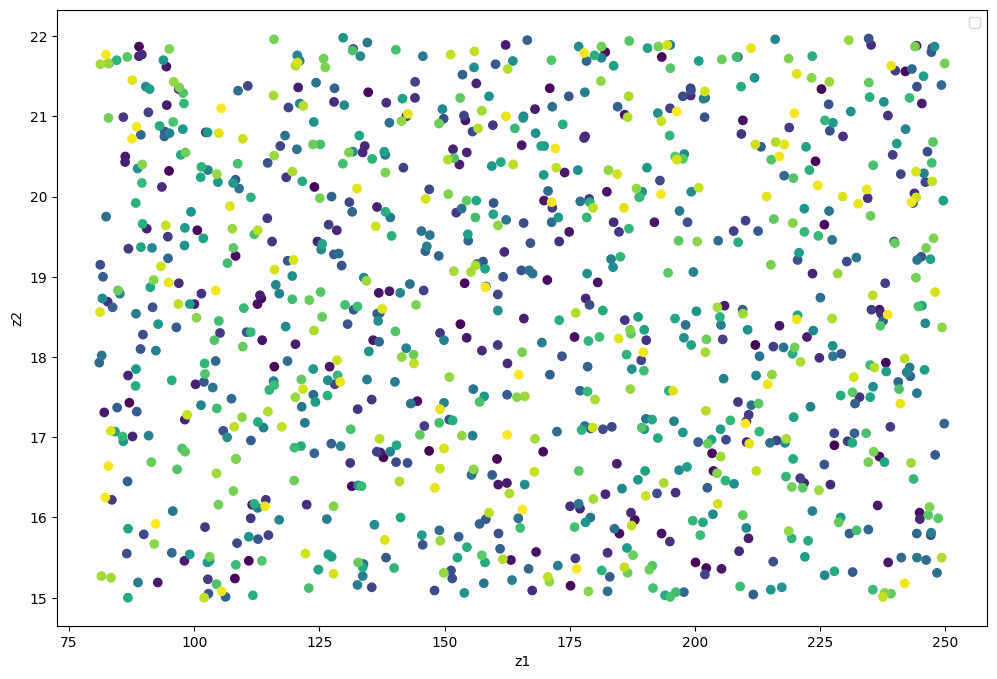

In [184]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

plt.scatter(
        X['weight_g'], X['sugar_content_brix'], c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [151]:
from sklearn.neighbors import NearestNeighbors

min_samples = 3

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [152]:
import sklearn
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

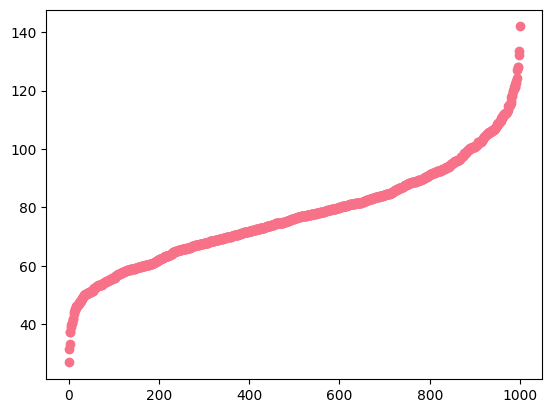

In [185]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

## DBSCAN для определения выбросов

In [169]:
dbscan = DBSCAN(eps = 0.0008, min_samples = 1)
print(dbscan)

DBSCAN(eps=0.0008, min_samples=1)


In [170]:
pred = dbscan.fit_predict(X)

In [171]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 1000
Estimated no. of noise points: 0
v_measure = 0.4620995419421128


In [172]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

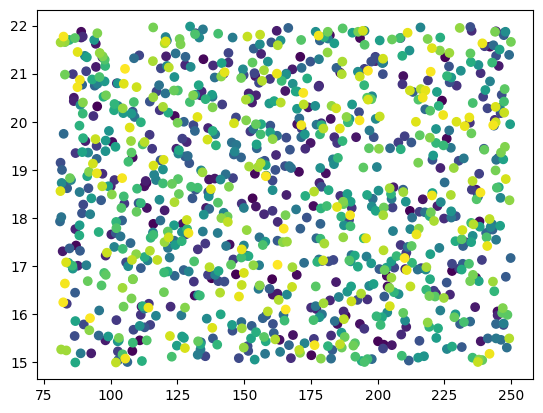

In [186]:
plt.scatter(X['weight_g'], X['sugar_content_brix'],c=dbscan_cluster1.labels_)
plt.scatter(values['weight_g'], values['sugar_content_brix'], color='r')
plt.show()